In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=1.0
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqparab=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqparab)

angle 0.0
1.0
(array([3.14159265, 0.        ]), 0.0, 50, 1.0, array([1., 1.]))


In [5]:
import getxyuvtwoparab_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqparab=getxyuvtwoparab_apper.getxyuveqtwoparabolas(initdateqparab,useperihelion)
print(xyuvaeqparab)
masses,xvec,avec=xyuvaeqparab

initdat 50 [3.14159265 0.        ] 1.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-50. ,   0. ,   0. ,  -0. ,  -0.1,   0. ],
       [ 50. ,   0. ,   0. ,  -0. ,   0.1,   0. ]]), array([[ 0.0001, -0.    ,  0.    ],
       [-0.0001, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaeqparab
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-50.    0.    0.   -0.   -0.1   0. ]
 [ 50.    0.    0.   -0.    0.1   0. ]] 0.0
[1. 1.] [[-50.    0.    0.   -0.   -0.1   0. ]
 [ 50.    0.    0.   -0.    0.1   0. ]] 0.0


In [12]:
print(xyuvaeqparab)

(array([1., 1.]), array([[-50. ,   0. ,   0. ,  -0. ,  -0.1,   0. ],
       [ 50. ,   0. ,   0. ,  -0. ,   0.1,   0. ]]), array([[ 0.0001, -0.    ,  0.    ],
       [-0.0001, -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [18]:
numsteps=5000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqparab,outputevery,delta)

0.01
[-1.50000048e-08  1.00000000e-03  0.00000000e+00]
[2.25000144e-16 1.00000000e-06 0.00000000e+00]
9.99999999758333e-07
0.0009999999998791666
150.000000018125 False
0.031496719605176714
[-1.80303218e-07  3.14967195e-03  0.00000000e+00]
[3.25092503e-14 9.92043339e-06 0.00000000e+00]
9.920433424721721e-06
0.0031496719550965497
47.624007242177036 False
0.07446707878465321
[-1.14081579e-06  7.44670770e-03  0.00000000e+00]
[1.30146067e-12 5.54534556e-05 0.00000000e+00]
5.545345687448538e-05
0.007446707787639137
20.14312959197707 False
0.14198372428539138
[-4.67040319e-06  1.41983709e-02  0.00000000e+00]
[2.18126659e-11 2.01593735e-04 0.00000000e+00]
0.00020159375712949784
0.014198371636546843
10.56459176021971 False
0.23037972367185205
[-1.39038035e-05  2.30379639e-02  0.00000000e+00]
[1.93315751e-10 5.30747779e-04 0.00000000e+00]
0.0005307479727804722
0.023037968069699034
6.510990880193523 False
0.3312062581751699
[-3.26282984e-05  3.31205934e-02  0.00000000e+00]
[1.06460586e-09 1.09697

0.9
[-0.00954271  0.08897654  0.        ]
[9.10632670e-05 7.91682495e-03 0.00000000e+00]
0.008007888221253527
0.08948680473261701
1.6762247847399847 False
0.9
[-0.00962005  0.08895969  0.        ]
[9.25452808e-05 7.91382615e-03 0.00000000e+00]
0.008006371426972072
0.08947832937070334
1.6763835562749392 False
0.9
[-0.00969732  0.08894271  0.        ]
[9.40381097e-05 7.91080487e-03 0.00000000e+00]
0.008004842975686162
0.08946978806103299
1.6765435936617568 False
0.9
[-0.00977454  0.08892559  0.        ]
[9.55417179e-05 7.90776117e-03 0.00000000e+00]
0.008003302890466467
0.08946118091365923
1.676704895554285 False
0.9
[-0.0098517   0.08890835  0.        ]
[9.70560695e-05 7.90469512e-03 0.00000000e+00]
0.008001751194530017
0.08945250803935023
1.6768674605972465 False
0.9
[-0.0099288   0.08889098  0.        ]
[9.85811285e-05 7.90160678e-03 0.00000000e+00]
0.008000187911243066
0.08944376954960623
1.6770312874258815 False
0.9
[-0.01000584  0.08887348  0.        ]
[0.00010012 0.0078985  0.    

1.7053734834376777 False
0.9
[-0.0187006   0.08593027  0.        ]
[0.00034971 0.00738401 0.        ]
0.0077337240364990095
0.08794159446188708
1.7056775115103051 False
0.9
[-0.01876771  0.08589954  0.        ]
[0.00035223 0.00737873 0.        ]
0.00773095836157149
0.08792586855739037
1.705982578973252 False
0.9
[-0.01883473  0.08586872  0.        ]
[0.00035475 0.00737344 0.        ]
0.007728184774204471
0.08791009483673914
1.7062886836667637 False
0.9
[-0.01890164  0.08583782  0.        ]
[0.00035727 0.00736813 0.        ]
0.007725403308086276
0.08789427346583095
1.7065958234277088 False
0.9
[-0.01896846  0.08580683  0.        ]
[0.0003598  0.00736281 0.        ]
0.007722613996923556
0.08787840461070943
1.706903996089615 False
0.9
[-0.01903518  0.08577575  0.        ]
[0.00036234 0.00735748 0.        ]
0.00771981687444246
0.08786248843757193
1.7072131994824848 False
0.9
[-0.01910179  0.08574458  0.        ]
[0.00036488 0.00735213 0.        ]
0.007717011974385159
0.0878465251127508
1.7

0.9
[-0.02633733  0.0814876   0.        ]
[0.00069365 0.00664023 0.        ]
0.007333883513965057
0.08563809616032492
1.7515569206394053 False
0.9
[-0.02639111  0.08144871  0.        ]
[0.00069649 0.00663389 0.        ]
0.007330383895681371
0.08561766112012971
1.7519749784981367 False
0.9
[-0.02644479  0.08140979  0.        ]
[0.00069933 0.00662755 0.        ]
0.007326880493408197
0.08559719909791556
1.7523937883576468 False
0.9
[-0.02649836  0.08137082  0.        ]
[0.00070216 0.00662121 0.        ]
0.00732337333717326
0.085576710249771
1.7528133479564483 False
0.9
[-0.02655182  0.08133181  0.        ]
[0.000705   0.00661486 0.        ]
0.007319862456936413
0.08555619473151206
1.7532336550348233 False
0.9
[-0.02660517  0.08129276  0.        ]
[0.00070784 0.00660851 0.        ]
0.007316347882593707
0.08553565269870633
1.7536547073343212 False
0.9
[-0.02665842  0.08125367  0.        ]
[0.00071067 0.00660216 0.        ]
0.007312829643971153
0.08551508430663653
1.7540765025984897 False
0.

1.807460999410795 False
0.9
[-0.03215308  0.076483    0.        ]
[0.00103382 0.00584965 0.        ]
0.006883469632594419
0.08296667784474933
1.8079547584234503 False
0.9
[-0.03219395  0.0764412   0.        ]
[0.00103645 0.00584326 0.        ]
0.006879707614059594
0.08294400288182138
1.8084490112409934 False
0.9
[-0.03223473  0.07639939  0.        ]
[0.00103908 0.00583687 0.        ]
0.006875944939409401
0.08292131776213763
1.808943755938366 False
0.9
[-0.03227541  0.07635758  0.        ]
[0.0010417  0.00583048 0.        ]
0.006872181629070552
0.08289862260056287
1.809438990594055 False
0.9
[-0.03231599  0.07631576  0.        ]
[0.00104432 0.00582409 0.        ]
0.006868417703383574
0.08287591751156409
1.8099347132907426 False
0.9
[-0.03235647  0.07627393  0.        ]
[0.00104694 0.00581771 0.        ]
0.006864653182613215
0.08285320260927284
1.810430922113953 False
0.9
[-0.03239685  0.07623209  0.        ]
[0.00104956 0.00581133 0.        ]
0.006860888086936654
0.08283047800741376
1.8

0.9
[-0.0365693   0.07122376  0.        ]
[0.00133731 0.00507282 0.        ]
0.006410138619199673
0.08006334129425073
1.873516612911724 False
0.9
[-0.03659882  0.07118255  0.        ]
[0.00133947 0.00506696 0.        ]
0.0064064290762906005
0.08004017164081172
1.8740589497126519 False
0.9
[-0.03662827  0.07114135  0.        ]
[0.00134163 0.00506109 0.        ]
0.006402720840166189
0.08001700344405674
1.8746015664641993 False
0.9
[-0.03665763  0.07110016  0.        ]
[0.00134378 0.00505523 0.        ]
0.006399013921872823
0.0799938367742967
1.8751444617317994 False
0.9
[-0.03668691  0.07105898  0.        ]
[0.00134593 0.00504938 0.        ]
0.006395308332397161
0.07997067170155044
1.8756876340841322 False
0.9
[-0.03671611  0.07101783  0.        ]
[0.00134807 0.00504353 0.        ]
0.006391604082659156
0.07994750829550072
1.8762310820941706 False
0.9
[-0.03674523  0.07097668  0.        ]
[0.00135021 0.00503769 0.        ]
0.006387901183519743
0.07992434662554172
1.8767748043380805 False


0.9
[-0.03955919  0.06644926  0.        ]
[0.00156493 0.0044155  0.        ]
0.005980432821371412
0.07733325818411772
1.939657057289307 False
0.9
[-0.0395802   0.06641045  0.        ]
[0.00156659 0.00441035 0.        ]
0.005976940459441499
0.07731067493846823
1.940223651124316 False
0.9
[-0.03960115  0.06637167  0.        ]
[0.00156825 0.0044052  0.        ]
0.005973450325197091
0.07728809950566187
1.9407903798826298 False
0.9
[-0.03962205  0.06633292  0.        ]
[0.00156991 0.00440006 0.        ]
0.005969962423472267
0.07726553192382919
1.941357242552536 False
0.9
[-0.03964287  0.06629419  0.        ]
[0.00157156 0.00439492 0.        ]
0.0059664767590606686
0.0772429722308811
1.941924238125462 False
0.9
[-0.03966364  0.06625548  0.        ]
[0.0015732  0.00438979 0.        ]
0.0059629933367175425
0.07722042046452184
1.942491365595659 False
0.9
[-0.03968434  0.0662168   0.        ]
[0.00157485 0.00438467 0.        ]
0.005959512161155225
0.0771978766622193
1.943058623960963 False
0.9
[

0.9
[-0.04161462  0.06212376  0.        ]
[0.00173178 0.00385936 0.        ]
0.005591138088377301
0.07477391315410276
2.006047211824565 False
0.9
[-0.04162928  0.06208808  0.        ]
[0.001733   0.00385493 0.        ]
0.005587927250210463
0.07475243976092327
2.0066234691434417 False
0.9
[-0.0416439   0.06205243  0.        ]
[0.00173421 0.0038505  0.        ]
0.0055847189704025905
0.07473097731464905
2.0071997636058807 False
0.9
[-0.04165847  0.06201682  0.        ]
[0.00173543 0.00384609 0.        ]
0.005581513250134467
0.074709525832617
2.007776094524647 False
0.9
[-0.04167299  0.06198122  0.        ]
[0.00173664 0.00384167 0.        ]
0.00557831009055621
0.07468808533197387
2.0083524612162633 False
0.9
[-0.04168746  0.06194566  0.        ]
[0.00173784 0.00383727 0.        ]
0.005575109492801925
0.07466665582977401
2.0089288629983897 False
0.9
[-0.04170189  0.06191013  0.        ]
[0.00173905 0.00383286 0.        ]
0.0055719114579738
0.07464523734287272
2.009505299192706 False
0.9
[-

0.07223895768508756
2.076441920077216 False
0.9
[-0.04309614  0.05795079  0.        ]
[0.00185728 0.00335829 0.        ]
0.005215571135520008
0.0722189112041992
2.0770182975463936 False
0.9
[-0.04310578  0.05791864  0.        ]
[0.00185811 0.00335457 0.        ]
0.005212677827388627
0.07219887691223893
2.0775946443368074 False
0.9
[-0.0431154   0.05788652  0.        ]
[0.00185894 0.00335085 0.        ]
0.005209787082171443
0.07217885481338314
2.078170960010681 False
0.9
[-0.04312497  0.05785443  0.        ]
[0.00185976 0.00334714 0.        ]
0.005206898898999371
0.07215884491175958
2.078747244131049 False
0.9
[-0.04313452  0.05782237  0.        ]
[0.00186059 0.00334343 0.        ]
0.005204013276986916
0.07213884721138061
2.079323496263689 False
0.9
[-0.04314403  0.05779034  0.        ]
[0.00186141 0.00333972 0.        ]
0.0052011302152427125
0.07211886171621619
2.0798997159750225 False
0.9
[-0.0431535   0.05775833  0.        ]
[0.00186222 0.00333602 0.        ]
0.005198249712858477
0.0

[-0.04403611  0.05426395  0.        ]
[0.00193918 0.00294458 0.        ]
0.004883755748527018
0.06988387330798872
2.14641794880097 False
0.9
[-0.04404216  0.05423515  0.        ]
[0.00193971 0.00294145 0.        ]
0.004881163592872356
0.06986532468164988
2.146987803799579 False
0.9
[-0.04404818  0.05420638  0.        ]
[0.00194024 0.00293833 0.        ]
0.004878573832685496
0.06984678827752566
2.147557585668759 False
0.9
[-0.04405418  0.05417763  0.        ]
[0.00194077 0.00293522 0.        ]
0.004875986466203549
0.06982826409272644
2.1481272941399747 False
0.9
[-0.04406016  0.05414891  0.        ]
[0.0019413 0.0029321 0.       ]
0.004873401491650504
0.06980975212425915
2.14869692894776 False
0.9
[-0.04406611  0.05412021  0.        ]
[0.00194182 0.002929   0.        ]
0.004870818907255064
0.06979125236915486
2.1492664898258 False
0.9
[-0.04407203  0.05409154  0.        ]
[0.00194234 0.00292589 0.        ]
0.004868238711233026
0.06977276482434264
2.1498359765108135 False
0.9
[-0.0440779

[-0.04460274  0.0509662   0.        ]
[0.0019894  0.00259755 0.        ]
0.004586957529348213
0.06772708121090272
2.2147713635096524 False
0.9
[-0.04460618  0.05094046  0.        ]
[0.00198971 0.00259493 0.        ]
0.004584641450460641
0.06770998043464967
2.2153307243202143 False
0.9
[-0.04460959  0.05091475  0.        ]
[0.00199002 0.00259231 0.        ]
0.004582327531689528
0.0676928912936176
2.2158899868728565 False
0.9
[-0.04461299  0.05088906  0.        ]
[0.00199032 0.0025897  0.        ]
0.004580015770983159
0.06767581378146227
2.216449151012469 False
0.9
[-0.04461637  0.0508634   0.        ]
[0.00199062 0.00258709 0.        ]
0.004577706166286328
0.0676587478918013
2.217008216585347 False
0.9
[-0.04461973  0.05083776  0.        ]
[0.00199092 0.00258448 0.        ]
0.004575398715542564
0.0676416936182305
2.217567183438657 False
0.9
[-0.04462308  0.05081215  0.        ]
[0.00199122 0.00258187 0.        ]
0.004573093416694755
0.06762465095432844
2.2181260514202914 False
0.9
[-0.0

0.9
[-0.04490463  0.04792814  0.        ]
[0.00201643 0.00229711 0.        ]
0.0043135325292765715
0.06567748875586346
2.2838875669802237 False
0.9
[-0.04490612  0.04790523  0.        ]
[0.00201656 0.00229491 0.        ]
0.004311470466824584
0.06566178848329204
2.284433663243398 False
0.9
[-0.04490759  0.04788234  0.        ]
[0.00201669 0.00229272 0.        ]
0.004309410307009108
0.06564609894737926
2.2849796470044215 False
0.9
[-0.04490906  0.04785947  0.        ]
[0.00201682 0.00229053 0.        ]
0.004307352047800481
0.06563042014036236
2.285525518184986 False
0.9
[-0.04491051  0.04783662  0.        ]
[0.00201695 0.00228834 0.        ]
0.0043052956871688225
0.06561475205446426
2.2860712767075735 False
0.9
[-0.04491194  0.04781379  0.        ]
[0.00201708 0.00228616 0.        ]
0.004303241223088408
0.06559909468192689
2.2866169224943023 False
0.9
[-0.04491337  0.04779099  0.        ]
[0.00201721 0.00228398 0.        ]
0.004301188653533494
0.06558344801497931
2.2871624554680303 False

2.3507254417465613 False
0.9
[-0.04499946  0.04522096  0.        ]
[0.00202495 0.00204494 0.        ]
0.004069886227214357
0.06379565994026833
2.351257125334929 False
0.9
[-0.04499955  0.04520052  0.        ]
[0.00202496 0.00204309 0.        ]
0.004068046637753403
0.06378124048459236
2.3517886899085245 False
0.9
[-0.04499964  0.0451801   0.        ]
[0.00202497 0.00204124 0.        ]
0.0040662087068145895
0.06376683077286019
2.352320135436957 False
0.9
[-0.04499972  0.04515969  0.        ]
[0.00202497 0.0020394  0.        ]
0.004064372432537015
0.06375243079708424
2.352851461890616 False
0.9
[-0.04499978  0.04513931  0.        ]
[0.00202498 0.00203756 0.        ]
0.004062537813059739
0.06373804054926492
2.3533826692406836 False
0.9
[-0.04499984  0.04511894  0.        ]
[0.00202499 0.00203572 0.        ]
0.004060704846528268
0.06372366002144154
2.353913757457253 False
0.9
[-0.04499989  0.0450986   0.        ]
[0.00202499 0.00203388 0.        ]
0.004058873531085526
0.06370928920562155
2.

0.9
[-0.04494896  0.04285737  0.        ]
[0.00202041 0.00183675 0.        ]
0.0038571633577602583
0.06210606538624274
2.4152230392818743 False
0.9
[-0.04494808  0.04283903  0.        ]
[0.00202033 0.00183518 0.        ]
0.003855512876523301
0.06209277636346519
2.415739942468712 False
0.9
[-0.0449472   0.04282071  0.        ]
[0.00202025 0.00183361 0.        ]
0.003853863839483905
0.06207949612781909
2.4162567249443563 False
0.9
[-0.04494631  0.0428024   0.        ]
[0.00202017 0.00183205 0.        ]
0.003852216244993548
0.0620662246716646
2.416773386709313 False
0.9
[-0.04494541  0.04278411  0.        ]
[0.00202009 0.00183048 0.        ]
0.00385057009140611
0.062052961987370994
2.4172899277640925 False
0.9
[-0.0449445   0.04276584  0.        ]
[0.00202001 0.00182892 0.        ]
0.003848925377076969
0.06203970806730935
2.4178063481094885 False
0.9
[-0.04494359  0.04274758  0.        ]
[0.00201993 0.00182736 0.        ]
0.0038472821003651004
0.06202646290386951
2.418322647745923 False
0

0.9
[-0.04479726  0.04073326  0.        ]
[0.00200679 0.0016592  0.        ]
0.0036659935292813798
0.06054744857780037
2.477395885761523 False
0.9
[-0.04479569  0.04071675  0.        ]
[0.00200665 0.00165785 0.        ]
0.0036645076067680546
0.06053517660640014
2.4778981149307673 False
0.9
[-0.04479411  0.04070026  0.        ]
[0.00200651 0.00165651 0.        ]
0.003663022940610448
0.06052291252583973
2.4784002246415158 False
0.9
[-0.04479252  0.04068377  0.        ]
[0.00200637 0.00165517 0.        ]
0.003661539529379895
0.06051065632911194
2.4789022149117614 False
0.9
[-0.04479093  0.0406673   0.        ]
[0.00200623 0.00165383 0.        ]
0.003660057371647459
0.06049840800919855
2.479404085760291 False
0.9
[-0.04478934  0.04065085  0.        ]
[0.00200608 0.00165249 0.        ]
0.00365857646598225
0.06048616755905643
2.479905837207253 False
0.9
[-0.04478774  0.04063441  0.        ]
[0.00200594 0.00165116 0.        ]
0.003657096810960667
0.060473934971693934
2.480407469271027 False
0

2.538768155344426 False
0.9
[-0.04456705  0.0387728   0.        ]
[0.00198622 0.00150333 0.        ]
0.003489551641785992
0.059072427085620854
2.5392557475687725 False
0.9
[-0.04456497  0.03875791  0.        ]
[0.00198604 0.00150218 0.        ]
0.003488212208000401
0.0590610887810274
2.539743223429798 False
0.9
[-0.04456288  0.03874304  0.        ]
[0.00198585 0.00150102 0.        ]
0.0034868738646349332
0.05904975753239748
2.5402305829571428 False
0.9
[-0.04456079  0.03872818  0.        ]
[0.00198566 0.00149987 0.        ]
0.003485536610462347
0.05903843333340026
2.540717826181532 False
0.9
[-0.0445587   0.03871334  0.        ]
[0.00198548 0.00149872 0.        ]
0.003484200444260472
0.05902711617774048
2.5412049531324725 False
0.9
[-0.04455661  0.0386985   0.        ]
[0.00198529 0.00149757 0.        ]
0.0034828653648041677
0.05901580605909037
2.5416919638411866 False
0.9
[-0.04455451  0.03868368  0.        ]
[0.0019851  0.00149643 0.        ]
0.003481531370872872
0.05900450297115358


0.9
[-0.04429087  0.03704267  0.        ]
[0.00196168 0.00137216 0.        ]
0.003333840491437357
0.057739418869931114
2.5978785885930575 False
0.9
[-0.04428844  0.03702917  0.        ]
[0.00196147 0.00137116 0.        ]
0.003332625484965804
0.057728896446803867
2.5983521118963755 False
0.9
[-0.04428601  0.03701568  0.        ]
[0.00196125 0.00137016 0.        ]
0.0033314114303360075
0.057718380350942
2.5988255229610218 False
0.9
[-0.04428358  0.0370022   0.        ]
[0.00196104 0.00136916 0.        ]
0.003330198326500087
0.05770787057672538
2.5992988218230617 False
0.9
[-0.04428114  0.03698874  0.        ]
[0.00196082 0.00136817 0.        ]
0.0033289861724096733
0.05769736711852347
2.5997720085193143 False
0.9
[-0.04427871  0.03697528  0.        ]
[0.0019606  0.00136717 0.        ]
0.0033277749670202125
0.057686869970732614
2.6002450830856723 False
0.9
[-0.04427627  0.03696183  0.        ]
[0.00196039 0.00136618 0.        ]
0.0033265647092865468
0.057676379127737785
2.6007180455588244

0.9
[-0.04398472  0.03549502  0.        ]
[0.00193466 0.0012599  0.        ]
0.0031945521728675994
0.056520369539375795
2.653910461351463 False
0.9
[-0.04398206  0.03548271  0.        ]
[0.00193442 0.00125902 0.        ]
0.0031934442667068113
0.05651056774362483
2.654370783895054 False
0.9
[-0.04397939  0.03547041  0.        ]
[0.00193419 0.00125815 0.        ]
0.003192337195751493
0.05650077163854927
2.654830998762116 False
0.9
[-0.04397673  0.03545812  0.        ]
[0.00193395 0.00125728 0.        ]
0.003191230959103485
0.05649098121915998
2.65529110599206 False
0.9
[-0.04397406  0.03544584  0.        ]
[0.00193372 0.00125641 0.        ]
0.0031901255558657864
0.056481196480472916
2.655751105624313 False
0.9
[-0.04397139  0.03543357  0.        ]
[0.00193348 0.00125554 0.        ]
0.0031890209851427893
0.056471417417511216
2.656210997698218 False
0.9
[-0.04396872  0.0354213   0.        ]
[0.00193325 0.00125467 0.        ]
0.003187917246042121
0.05646164402532148
2.6566707822522697 False

[0.00190529 0.00116001 0.        ]
0.003065297039286582
0.055365124756353454
2.709286769606469 False
0.9
[-0.04364682  0.03404761  0.        ]
[0.00190505 0.00115924 0.        ]
0.00306428472974969
0.05535598187865237
2.709734249296125 False
0.9
[-0.043644    0.03403637  0.        ]
[0.0019048  0.00115847 0.        ]
0.0030632731539915726
0.055346844119530184
2.7101816261836262 False
0.9
[-0.04364118  0.03402514  0.        ]
[0.00190455 0.00115771 0.        ]
0.0030622623112431615
0.05533771147457366
2.710628900310078 False
0.9
[-0.04363835  0.03401391  0.        ]
[0.00190431 0.00115695 0.        ]
0.00306125220073972
0.055328583939404416
2.7110760717151052 False
0.9
[-0.04363553  0.0340027   0.        ]
[0.00190406 0.00115618 0.        ]
0.0030602428217137946
0.05531946150961517
2.711523140439974 False
0.9
[-0.0436327   0.03399149  0.        ]
[0.00190381 0.00115542 0.        ]
0.003059234173403497
0.05531034418084466
2.7119701065239203 False
0.9
[-0.04362988  0.03398029  0.        ]

0.9
[-0.04330479  0.03276502  0.        ]
[0.00187531 0.00107355 0.        ]
0.0029488513972303057
0.05430332768100225
2.762261658827894 False
0.9
[-0.04330187  0.03275469  0.        ]
[0.00187505 0.00107287 0.        ]
0.0029479219276522593
0.05429476887925999
2.7626970902771144 False
0.9
[-0.04329895  0.03274437  0.        ]
[0.0018748  0.00107219 0.        ]
0.002946993106426125
0.05428621469973869
2.7631324237591763 False
0.9
[-0.04329603  0.03273405  0.        ]
[0.00187455 0.00107152 0.        ]
0.0029460649328957008
0.05427766513857888
2.7635676593130505 False
0.9
[-0.04329311  0.03272375  0.        ]
[0.00187429 0.00107084 0.        ]
0.0029451374064006653
0.054269120191879516
2.7640027969800225 False
0.9
[-0.04329019  0.03271345  0.        ]
[0.00187404 0.00107017 0.        ]
0.0029442105262846648
0.054260579855772505
2.7644378367999005 False
0.9
[-0.04328727  0.03270316  0.        ]
[0.00187379 0.0010695  0.        ]
0.0029432842918915595
0.05425204412638808
2.764872778812777

0.05336454925291675
2.810854810917408 False
0.9
[-0.04296867  0.03163239  0.        ]
[0.00184631 0.00100061 0.        ]
0.002846914931436578
0.053356489122098144
2.8112794238906536 False
0.9
[-0.0429657   0.03162284  0.        ]
[0.00184605 0.001      0.        ]
0.0028460553248450537
0.053348433199533175
2.8117039433749023 False
0.9
[-0.04296273  0.03161329  0.        ]
[0.0018458 0.0009994 0.       ]
0.002845196296620035
0.05334038148176328
2.812128369409656 False
0.9
[-0.04295976  0.03160375  0.        ]
[0.00184554 0.0009988  0.        ]
0.002844337846189797
0.05333233396533286
2.8125527020344387 False
0.9
[-0.04295678  0.03159422  0.        ]
[0.00184529 0.00099819 0.        ]
0.002843479972985735
0.053324290646812496
2.81297694128757 False
0.9
[-0.04295381  0.0315847   0.        ]
[0.00184503 0.00099759 0.        ]
0.0028426226764386667
0.0533162515227643
2.813401087207995 False
0.9
[-0.04295083  0.03157518  0.        ]
[0.00184477 0.00099699 0.        ]
0.002841765955978899
0.0

0.9
[-0.04261622  0.03054807  0.        ]
[0.00181614 0.00093318 0.        ]
0.0027493267177299482
0.05243402252097342
2.8607379862950726 False
0.9
[-0.04261322  0.03053924  0.        ]
[0.00181589 0.00093265 0.        ]
0.0027485315995604354
0.05242643989019696
2.8611517454582676 False
0.9
[-0.04261022  0.03053041  0.        ]
[0.00181563 0.00093211 0.        ]
0.0027477369970334816
0.05241886108104107
2.8615654157021018 False
0.9
[-0.04260722  0.03052159  0.        ]
[0.00181538 0.00093157 0.        ]
0.0027469429096571097
0.05241128609047015
2.8619789970632725 False
0.9
[-0.04260423  0.03051277  0.        ]
[0.00181512 0.00093103 0.        ]
0.0027461493369346814
0.05240371491540157
2.8623924895812043 False
0.9
[-0.04260123  0.03050396  0.        ]
[0.00181486 0.00093049 0.        ]
0.0027453562783734905
0.052396147552787604
2.862805893293573 False
0.9
[-0.04259823  0.03049515  0.        ]
[0.00181461 0.00092995 0.        ]
0.002744563733484317
0.05238858399961118
2.8632192082365364

[0.00178686 0.00087429 0.        ]
0.002661150276622292
0.05158633808114598
2.907746616246496 False
0.9
[-0.04226831  0.02956013  0.        ]
[0.00178661 0.0008738  0.        ]
0.0026604113633083657
0.05157917567495981
2.9081503928109624 False
0.9
[-0.04226532  0.02955192  0.        ]
[0.00178636 0.00087332 0.        ]
0.0026596729125910046
0.05157201675900415
2.9085540846880096 False
0.9
[-0.04226232  0.02954372  0.        ]
[0.0017861  0.00087283 0.        ]
0.0026589349240372993
0.05156486133053496
2.9089576919151936 False
0.9
[-0.04225932  0.02953553  0.        ]
[0.00178585 0.00087235 0.        ]
0.0026581973972204225
0.05155770938686495
2.909361214527009 False
0.9
[-0.04225632  0.02952734  0.        ]
[0.0017856  0.00087186 0.        ]
0.002657460331709905
0.05155056092526933
2.909764652560205 False
0.9
[-0.04225332  0.02951915  0.        ]
[0.00178534 0.00087138 0.        ]
0.0026567237270785976
0.05154341594305326
2.910168006049979 False
0.9
[-0.04225033  0.02951097  0.        

0.9
[-0.04190045  0.02858805  0.        ]
[0.00175565 0.00081728 0.        ]
0.0025729240746371206
0.05072399900083904
2.9571800913709265 False
0.9
[-0.04189747  0.02858044  0.        ]
[0.0017554  0.00081684 0.        ]
0.0025722393963123506
0.05071724949474637
2.957573636076972 False
0.9
[-0.04189449  0.02857283  0.        ]
[0.00175515 0.00081641 0.        ]
0.002571555130956115
0.050710503162127225
2.9579671004334744 False
0.9
[-0.04189151  0.02856524  0.        ]
[0.0017549  0.00081597 0.        ]
0.0025708712781945505
0.0507037600005616
2.9583604844756795 False
0.9
[-0.04188853  0.02855764  0.        ]
[0.00175465 0.00081554 0.        ]
0.0025701878376581536
0.0506970200076706
2.9587537882365584 False
0.9
[-0.04188555  0.02855005  0.        ]
[0.0017544  0.00081511 0.        ]
0.002569504808974206
0.05069028318104177
2.9591470117511633 False
0.9
[-0.04188257  0.02854247  0.        ]
[0.00175415 0.00081467 0.        ]
0.0025688221917722904
0.05068354951828345
2.9595401550534532 Fa

0.9
[-0.04158877  0.02781356  0.        ]
[0.00172963 0.00077359 0.        ]
0.00250321997713392
0.05003218940975819
2.9980698780042645 False
0.9
[-0.04158582  0.02780641  0.        ]
[0.00172938 0.0007732  0.        ]
0.0025025767089332544
0.05002576045332299
2.9984551687117063 False
0.9
[-0.04158287  0.02779926  0.        ]
[0.00172913 0.0007728  0.        ]
0.002501933816916091
0.050019334430958705
2.9988403825533467 False
0.9
[-0.04157991  0.02779213  0.        ]
[0.00172889 0.0007724  0.        ]
0.002501291300753429
0.05001291134050716
2.999225519561184 False
0.9
[-0.04157696  0.02778499  0.        ]
[0.00172864 0.00077201 0.        ]
0.0025006491601189426
0.05000649117983527
2.999610579765819 False
0.9
[-0.041574    0.02777786  0.        ]
[0.0017284  0.00077161 0.        ]
0.0025000073946816557
0.050000073946761876
2.9999955632008493 False
0.9
[-0.04157105  0.02777073  0.        ]
[0.00172815 0.00077121 0.        ]
0.0024993660041105065
0.0499936596391033
3.0003804699001315 Fal

0.9
[-0.04123359  0.02697804  0.        ]
[0.00170021 0.00072781 0.        ]
0.0024280238049530956
0.04927498153173774
3.044141171385033 False
0.9
[-0.04123068  0.02697138  0.        ]
[0.00169997 0.00072746 0.        ]
0.002427423766160327
0.04926889247953852
3.0445173912179033 False
0.9
[-0.04122776  0.02696471  0.        ]
[0.00169973 0.0007271  0.        ]
0.0024268240662511974
0.04926280611426025
3.0448935379785245 False
0.9
[-0.04122485  0.02695805  0.        ]
[0.00169949 0.00072674 0.        ]
0.0024262247049385626
0.049256722433984206
3.0452696116968783 False
0.9
[-0.04122193  0.0269514   0.        ]
[0.00169925 0.00072638 0.        ]
0.002425625681937143
0.049250641436809156
3.0456456124019606 False
0.9
[-0.04121902  0.02694474  0.        ]
[0.00169901 0.00072602 0.        ]
0.002425026996953343
0.04924456312074809
3.0460215401281703 False
0.9
[-0.04121611  0.0269381   0.        ]
[0.00169877 0.00072566 0.        ]
0.0024244286497069677
0.04923848748394865
3.046397394901677 F

[-0.04087509  0.02617908  0.        ]
[0.00167077 0.00068534 0.        ]
0.0023561169610921435
0.04853984920755465
3.0902444578804804 False
0.9
[-0.04087222  0.02617285  0.        ]
[0.00167054 0.00068502 0.        ]
0.0023555568439124646
0.04853407920124234
3.0906118436498615 False
0.9
[-0.04086936  0.02616663  0.        ]
[0.0016703  0.00068469 0.        ]
0.002354997032227251
0.04852831165646762
3.090979159997393 False
0.9
[-0.04086649  0.02616042  0.        ]
[0.00167007 0.00068437 0.        ]
0.0023544375257886336
0.04852254657155407
3.091346406949223 False
0.9
[-0.04086363  0.0261542   0.        ]
[0.00166984 0.00068404 0.        ]
0.0023538783243413214
0.04851678394474763
3.091713584536529 False
0.9
[-0.04086076  0.02614799  0.        ]
[0.0016696  0.00068372 0.        ]
0.0023533194276337123
0.04851102377433105
3.0920806927882327 False
0.9
[-0.0408579   0.02614179  0.        ]
[0.00166937 0.00068339 0.        ]
0.002352760835418862
0.0485052660586339
3.0924477317303594 False
0.

0.9
[-0.04054546  0.0254791   0.        ]
[0.00164393 0.00064918 0.        ]
0.0022931191736733844
0.04788652392556161
3.1324052719544064 False
0.9
[-0.04054265  0.02547325  0.        ]
[0.00164371 0.00064889 0.        ]
0.002292592882940767
0.0478810284240091
3.13276479092469 False
0.9
[-0.04053983  0.02546741  0.        ]
[0.00164348 0.00064859 0.        ]
0.0022920668702551823
0.04787553519549606
3.133124243676578 False
0.9
[-0.04053702  0.02546157  0.        ]
[0.00164325 0.00064829 0.        ]
0.00229154113539118
0.047870044238450205
3.13348363023899 False
0.9
[-0.0405342   0.02545573  0.        ]
[0.00164302 0.00064799 0.        ]
0.0022910156781310105
0.047864555551378626
3.1338429506357257 False
0.9
[-0.04053139  0.02544989  0.        ]
[0.00164279 0.0006477  0.        ]
0.002290490498248998
0.0478590691327046
3.134202204896149 False
0.9
[-0.04052857  0.02544406  0.        ]
[0.00164257 0.0006474  0.        ]
0.002289965595525692
0.0478535849809154
3.1345613930455123 False
0.9


0.9
[-0.04019978  0.02477681  0.        ]
[0.00161602 0.00061389 0.        ]
0.0022299126750364466
0.047221951198954566
3.176488819109211 False
0.9
[-0.04019702  0.02477132  0.        ]
[0.0016158  0.00061362 0.        ]
0.0022294192361458675
0.04721672623282842
3.176840326886309 False
0.9
[-0.04019427  0.02476585  0.        ]
[0.00161558 0.00061335 0.        ]
0.0022289260494210822
0.04721150335904463
3.177191771658834 False
0.9
[-0.04019151  0.02476037  0.        ]
[0.00161536 0.00061308 0.        ]
0.002228433114668265
0.047206282576244714
3.1775431534505842 False
0.9
[-0.04018875  0.02475489  0.        ]
[0.00161514 0.0006128  0.        ]
0.002227940431689242
0.04720106388302325
3.1778944722885853 False
0.9
[-0.04018599  0.02474942  0.        ]
[0.00161491 0.00061253 0.        ]
0.0022274480002924864
0.04719584727804435
3.1782457281952525 False
0.9
[-0.04018324  0.02474395  0.        ]
[0.00161469 0.00061226 0.        ]
0.0022269558202786988
0.04719063275988889
3.1785969211986713 F

0.9
[-0.03986946  0.02413314  0.        ]
[0.00158957 0.00058241 0.        ]
0.00217198262150968
0.0466045343449506
3.2185709418262185 False
0.9
[-0.03986676  0.02412798  0.        ]
[0.00158936 0.00058216 0.        ]
0.002171518330245148
0.046599552897481196
3.218915003970088 False
0.9
[-0.03986406  0.02412283  0.        ]
[0.00158914 0.00058191 0.        ]
0.0021710542688600826
0.04659457338424811
3.2192590060435964 False
0.9
[-0.03986136  0.02411767  0.        ]
[0.00158893 0.00058166 0.        ]
0.002170590437183888
0.046589595804040713
3.2196029480683004 False
0.9
[-0.03985867  0.02411252  0.        ]
[0.00158871 0.00058141 0.        ]
0.0021701268350397076
0.0465846201555804
3.219946830070512 False
0.9
[-0.03985597  0.02410737  0.        ]
[0.0015885  0.00058117 0.        ]
0.0021696634622580743
0.04657964643766711
3.2202906520711787 False
0.9
[-0.03985327  0.02410223  0.        ]
[0.00158828 0.00058092 0.        ]
0.002169200318663739
0.04657467464903796
3.2206344140956524 False

0.9
[-0.03955155  0.02353667  0.        ]
[0.00156433 0.00055397 0.        ]
0.0021182998624242073
0.04602499171563432
3.2590989027608277 False
0.9
[-0.03954891  0.0235318   0.        ]
[0.00156412 0.00055375 0.        ]
0.002117861756578079
0.04602023203524814
3.259435977748025 False
0.9
[-0.03954627  0.02352693  0.        ]
[0.00156391 0.00055352 0.        ]
0.0021174238611591646
0.0460154741490204
3.2597729953673262 False
0.9
[-0.03954363  0.02352207  0.        ]
[0.0015637  0.00055329 0.        ]
0.0021169861760120686
0.046010718055819
3.260109955641725 False
0.9
[-0.03954099  0.02351721  0.        ]
[0.00156349 0.00055306 0.        ]
0.0021165487009817087
0.04600596375451457
3.2604468585940767 False
0.9
[-0.03953835  0.02351235  0.        ]
[0.00156328 0.00055283 0.        ]
0.002116111435912677
0.046001211243973536
3.260783704247592 False
0.9
[-0.03953571  0.02350749  0.        ]
[0.00156307 0.0005526  0.        ]
0.002115674380656349
0.04599646052313535
3.261120492620358 False
0

[0.00154064 0.00052862 0.        ]
0.0020692599836025513
0.04548911939796759
3.2974918394815496 False
0.9
[-0.03924838  0.02298717  0.        ]
[0.00154044 0.00052841 0.        ]
0.0020688451021358637
0.045484558941863595
3.29782245864412 False
0.9
[-0.03924579  0.02298256  0.        ]
[0.00154023 0.0005282  0.        ]
0.0020684304143074816
0.04548000015729421
3.298153022894011 False
0.9
[-0.03924321  0.02297795  0.        ]
[0.00154003 0.00052799 0.        ]
0.0020680159199784054
0.045475443043233844
3.298483532252646 False
0.9
[-0.03924063  0.02297335  0.        ]
[0.00153983 0.00052777 0.        ]
0.002067601619015869
0.04547088759872485
3.2988139867365702 False
0.9
[-0.03923804  0.02296875  0.        ]
[0.00153962 0.00052756 0.        ]
0.002067187511272856
0.04546633382265229
3.299144386373788 False
0.9
[-0.03923546  0.02296415  0.        ]
[0.00153942 0.00052735 0.        ]
0.002066773596617888
0.045461781714071524
3.29947473118 False
0.9
[-0.03923288  0.02295955  0.        ]
[0

[0.00151685 0.00050436 0.        ]
0.002021211824836971
0.04495788946155025
3.3364555542200414 False
0.9
[-0.03894429  0.02245355  0.        ]
[0.00151666 0.00050416 0.        ]
0.002020819051444558
0.04495352101275892
3.3367797809970496 False
0.9
[-0.03894176  0.02244918  0.        ]
[0.00151646 0.00050397 0.        ]
0.0020204264561321595
0.044949154120318656
3.3371039552487267 False
0.9
[-0.03893923  0.02244482  0.        ]
[0.00151626 0.00050377 0.        ]
0.002020034038781829
0.04494478878337097
3.337428076989833 False
0.9
[-0.03893671  0.02244046  0.        ]
[0.00151607 0.00050357 0.        ]
0.002019641799266332
0.04494042500095356
3.3377521462428814 False
0.9
[-0.03893419  0.02243611  0.        ]
[0.00151587 0.00050338 0.        ]
0.002019249737462766
0.04493606277215179
3.3380761630268916 False
0.9
[-0.03893166  0.02243175  0.        ]
[0.00151567 0.00050318 0.        ]
0.0020188578532491465
0.04493170209606071
3.3384001273602077 False
0.9
[-0.03892914  0.0224274   0.       

0.9
[-0.0386447   0.02194383  0.        ]
[0.00149341 0.00048153 0.        ]
0.001974944478191169
0.044440347413034126
3.3753111470052497 False
0.9
[-0.03864223  0.02193969  0.        ]
[0.00149322 0.00048135 0.        ]
0.0019745723873193176
0.04443616080760485
3.3756291559357403 False
0.9
[-0.03863977  0.02193556  0.        ]
[0.00149303 0.00048117 0.        ]
0.001974200460366678
0.0444319756523011
3.3759471146143283 False
0.9
[-0.0386373   0.02193143  0.        ]
[0.00149284 0.00048099 0.        ]
0.0019738286972225817
0.044427791946287196
3.3762650230591844 False
0.9
[-0.03863484  0.0219273   0.        ]
[0.00149265 0.00048081 0.        ]
0.0019734570977768713
0.04442360968873276
3.3765828812881176 False
0.9
[-0.03863237  0.02192317  0.        ]
[0.00149246 0.00048063 0.        ]
0.0019730856619182037
0.04441942887879361
3.3769006893200255 False
0.9
[-0.03862991  0.02191905  0.        ]
[0.00149227 0.00048044 0.        ]
0.001972714389536101
0.04441524951563484
3.3772184471731435 

3.41155720103954 False
0.9
[-0.03836177  0.02147609  0.        ]
[0.00147163 0.00046122 0.        ]
0.0019328479132519562
0.04396416624083705
3.4118695479926857 False
0.9
[-0.03835936  0.02147216  0.        ]
[0.00147144 0.00046105 0.        ]
0.0019324941230045452
0.04396014243612668
3.4121818467250735 False
0.9
[-0.03835695  0.02146823  0.        ]
[0.00147126 0.00046088 0.        ]
0.0019321404844694942
0.04395611998879671
3.4124940972549704 False
0.9
[-0.03835454  0.0214643   0.        ]
[0.00147107 0.00046072 0.        ]
0.001931786997547218
0.043952098898086975
3.412806299599239 False
0.9
[-0.03835213  0.02146037  0.        ]
[0.00147089 0.00046055 0.        ]
0.0019314336621380568
0.04394807916323598
3.4131184537748793 False
0.9
[-0.03834972  0.02145645  0.        ]
[0.0014707  0.00046038 0.        ]
0.0019310804781425346
0.04394406078348398
3.413430559798795 False
0.9
[-0.03834731  0.02145253  0.        ]
[0.00147052 0.00046021 0.        ]
0.0019307274454586614
0.04394004375804

0.9
[-0.03806882  0.0210049   0.        ]
[0.00144923 0.00044121 0.        ]
0.0018904405559085743
0.043479196817657224
3.449925734117606 False
0.9
[-0.03806647  0.02100116  0.        ]
[0.00144906 0.00044105 0.        ]
0.0018901047024327707
0.04347533441427186
3.450232229858565 False
0.9
[-0.03806411  0.02099743  0.        ]
[0.00144888 0.00044089 0.        ]
0.0018897689890145424
0.04347147327862885
3.4505386794365207 False
0.9
[-0.03806176  0.0209937   0.        ]
[0.0014487  0.00044074 0.        ]
0.0018894334155573427
0.043467613409955495
3.450845082873704 False
0.9
[-0.03805941  0.02098998  0.        ]
[0.00144852 0.00044058 0.        ]
0.0018890979819783254
0.04346375480763628
3.4511514401799 False
0.9
[-0.03805706  0.02098625  0.        ]
[0.00144834 0.00044042 0.        ]
0.0018887626881832036
0.04345989747092374
3.4514577513754023 False
0.9
[-0.03805471  0.02098253  0.        ]
[0.00144816 0.00044027 0.        ]
0.0018884275340825105
0.04345604139912551
3.451764016476165 Fal

3.4866811586271056 False
0.9
[-0.03778527  0.02056083  0.        ]
[0.00142773 0.00042275 0.        ]
0.001850474314989292
0.043017139781595104
3.4869821834174464 False
0.9
[-0.03778298  0.02055728  0.        ]
[0.00142755 0.0004226  0.        ]
0.001850154907212052
0.043013427057281214
3.4872831639349307 False
0.9
[-0.03778068  0.02055373  0.        ]
[0.00142738 0.00042246 0.        ]
0.0018498356290737028
0.043009715519562584
3.487584100196474 False
0.9
[-0.03777839  0.02055018  0.        ]
[0.00142721 0.00042231 0.        ]
0.0018495164804967544
0.04300600516784551
3.487884992213859 False
0.9
[-0.03777609  0.02054664  0.        ]
[0.00142703 0.00042216 0.        ]
0.0018491974613972187
0.04300229600146042
3.4881858400050496 False
0.9
[-0.0377738  0.0205431  0.       ]
[0.00142686 0.00042202 0.        ]
0.001848878571696519
0.04299858801980036
3.488486643582964 False
0.9
[-0.0377715   0.02053955  0.        ]
[0.00142669 0.00042187 0.        ]
0.0018485598113119183
0.0429948812222096

0.9
[-0.0375108  0.0201416  0.       ]
[0.00140706 0.00040568 0.        ]
0.0018127443915669245
0.04257633605146085
3.5230838045504695 False
0.9
[-0.03750856  0.02013822  0.        ]
[0.00140689 0.00040555 0.        ]
0.0018124401009413276
0.04257276243023616
3.5233795374637595 False
0.9
[-0.03750632  0.02013484  0.        ]
[0.00140672 0.00040541 0.        ]
0.0018121359306227163
0.04256918992208703
3.523675227894634 False
0.9
[-0.03750408  0.02013147  0.        ]
[0.00140656 0.00040528 0.        ]
0.001811831880540675
0.04256561852646658
3.523970875854477 False
0.9
[-0.03750184  0.02012809  0.        ]
[0.00140639 0.00040514 0.        ]
0.0018115279506182712
0.04256204824275109
3.5242664813610585 False
0.9
[-0.0374996   0.02012471  0.        ]
[0.00140622 0.000405   0.        ]
0.001811224140785004
0.04255847907039212
3.524562044425944 False
0.9
[-0.03749736  0.02012134  0.        ]
[0.00140605 0.00040487 0.        ]
0.001810920450966144
0.04255491100879127
3.5248575650648646 False
0

0.9
[-0.03726697  0.01977754  0.        ]
[0.00138883 0.00039115 0.        ]
0.0017799781772849382
0.042189787594688576
3.5553627679055686 False
0.9
[-0.03726478  0.0197743   0.        ]
[0.00138866 0.00039102 0.        ]
0.0017796866933976337
0.0421863330167204
3.555653911434967 False
0.9
[-0.03726259  0.01977106  0.        ]
[0.0013885  0.00039089 0.        ]
0.0017793953220967933
0.04218287949034292
3.555945014003609 False
0.9
[-0.0372604   0.01976782  0.        ]
[0.00138834 0.00039077 0.        ]
0.0017791040633125072
0.04217942701498572
3.556236075627752 False
0.9
[-0.03725821  0.01976459  0.        ]
[0.00138817 0.00039064 0.        ]
0.0017788129169825039
0.042175975590168675
3.556527096316069 False
0.9
[-0.03725602  0.01976135  0.        ]
[0.00138801 0.00039051 0.        ]
0.0017785218830346902
0.04217252521529497
3.5568180760870955 False
0.9
[-0.03725383  0.01975812  0.        ]
[0.00138785 0.00039038 0.        ]
0.00177823096140798
0.04216907588989804
3.557109014948411 Fals

0.9
[-0.037007    0.01939762  0.        ]
[0.00136952 0.00037627 0.        ]
0.0017457855547309276
0.04178259870724806
3.5900112640427837 False
0.9
[-0.03700486  0.01939452  0.        ]
[0.00136936 0.00037615 0.        ]
0.00174550711653883
0.04177926658689487
3.590297586675476 False
0.9
[-0.03700272  0.01939143  0.        ]
[0.0013692  0.00037603 0.        ]
0.0017452287832416097
0.04177593545621223
3.5905838699225217 False
0.9
[-0.03700058  0.01938834  0.        ]
[0.00136904 0.00037591 0.        ]
0.0017449505547847432
0.04177260531478427
3.5908701137899004 False
0.9
[-0.03699844  0.01938525  0.        ]
[0.00136888 0.00037579 0.        ]
0.001744672431107422
0.041769276162119715
3.591156318290093 False
0.9
[-0.0369963   0.01938216  0.        ]
[0.00136873 0.00037567 0.        ]
0.0017443944121424567
0.04176594799765063
3.591442483442196 False
0.9
[-0.03699416  0.01937907  0.        ]
[0.00136857 0.00037555 0.        ]
0.0017441164978354044
0.041762620820961466
3.5917286092522263 Fa

0.9
[-0.03675104  0.01903154  0.        ]
[0.00135064 0.0003622  0.        ]
0.0017128389130150207
0.04138645808733843
3.6243739361182556 False
0.9
[-0.03674895  0.01902859  0.        ]
[0.00135049 0.00036209 0.        ]
0.0017125727376470176
0.04138324223217675
3.624655583012062 False
0.9
[-0.03674686  0.01902563  0.        ]
[0.00135033 0.00036197 0.        ]
0.0017123066601234956
0.041380027309361404
3.624937192007737 False
0.9
[-0.03674478  0.01902267  0.        ]
[0.00135018 0.00036186 0.        ]
0.0017120406803888739
0.041376813318438066
3.625218763117216 False
0.9
[-0.03674269  0.01901972  0.        ]
[0.00135003 0.00036175 0.        ]
0.0017117747983834192
0.04137360025890204
3.625500296356869 False
0.9
[-0.0367406   0.01901677  0.        ]
[0.00134987 0.00036164 0.        ]
0.0017115090140590208
0.041370388130388874
3.6257817917308 False
0.9
[-0.03673851  0.01901381  0.        ]
[0.00134972 0.00036153 0.        ]
0.0017112433273528986
0.04136717693235663
3.626063249258685 Fal

0.9
[-0.03651746  0.01870408  0.        ]
[0.00133352 0.00034984 0.        ]
0.0016833674917306383
0.0410288616918705
3.6559629932341298 False
0.9
[-0.03651541  0.01870124  0.        ]
[0.00133338 0.00034974 0.        ]
0.0016831120303100514
0.041025748382083796
3.656240432301436 False
0.9
[-0.03651337  0.01869841  0.        ]
[0.00133323 0.00034963 0.        ]
0.0016828566607046875
0.04102263595510029
3.656517834791908 False
0.9
[-0.03651133  0.01869557  0.        ]
[0.00133308 0.00034952 0.        ]
0.0016826013828637328
0.04101952441050155
3.656795200716612 False
0.9
[-0.03650928  0.01869274  0.        ]
[0.00133293 0.00034942 0.        ]
0.0016823461967395833
0.041016413747908084
3.6570725300831617 False
0.9
[-0.03650724  0.0186899   0.        ]
[0.00133278 0.00034931 0.        ]
0.0016820911022751926
0.041013303966825114
3.6573498229094676 False
0.9
[-0.0365052   0.01868707  0.        ]
[0.00133263 0.00034921 0.        ]
0.0016818360994250753
0.04101019506689861
3.6576270792009113

In [19]:
npstar1x

array([[-5.00000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.00000000e-01,  0.00000000e+00],
       [-5.00000000e+01, -1.00000000e-03,  0.00000000e+00,
         1.00000000e-06, -1.00000000e-01,  0.00000000e+00],
       [-4.99999999e+01, -4.14967196e-03,  0.00000000e+00,
         4.14967195e-06, -9.99999998e-02,  0.00000000e+00],
       ...,
       [ 1.42940319e+02, -1.96438448e+02,  0.00000000e+00,
         4.04293632e-02, -2.05811864e-02,  0.00000000e+00],
       [ 1.42976705e+02, -1.96456970e+02,  0.00000000e+00,
         4.04271204e-02, -2.05781044e-02,  0.00000000e+00],
       [ 1.43013088e+02, -1.96475489e+02,  0.00000000e+00,
         4.04248780e-02, -2.05750235e-02,  0.00000000e+00]])

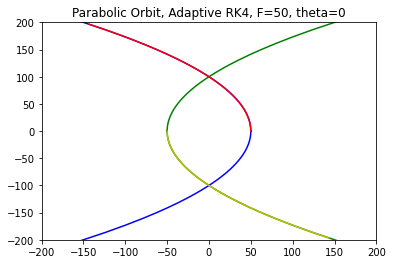

In [20]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5